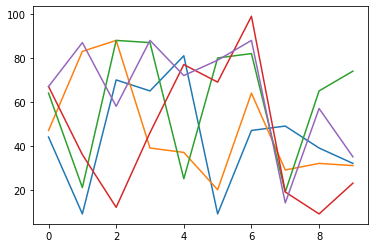

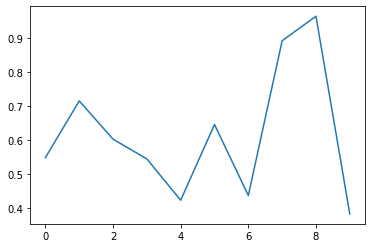

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from offline_RL import policy_iter, get_q_func, offline_policy_iter

n_action = 5
n_state = 10
np.random.seed(0)
rewards = np.random.randint(0,100,size=(n_state,n_action))
plt.plot(rewards)
np.random.seed(0)
t_matrix = np.random.rand(n_state,n_action,n_state)
plt.figure()
plt.plot(t_matrix[0][0])

sums = []
for i in range(n_state):
    for j in range(n_action):
        t_matrix[i][j] = t_matrix[i][j]/np.sum(t_matrix[i][j])
        sums.append(np.sum(t_matrix[i][j]))
#check to make sure valid transition probabilities have been create
# plt.plot(sums)
gamma = 0.99

Text(0.5, 1.0, 'Expert Policy')

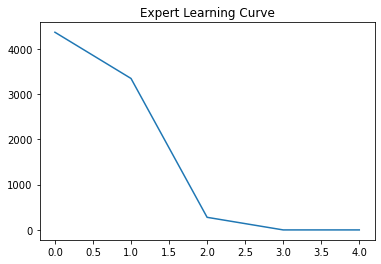

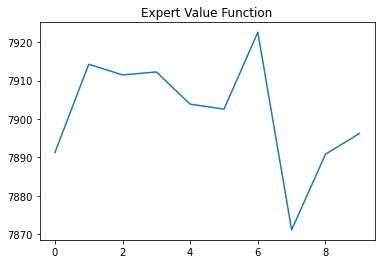

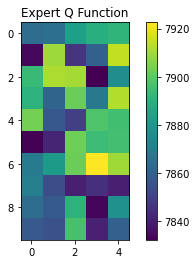

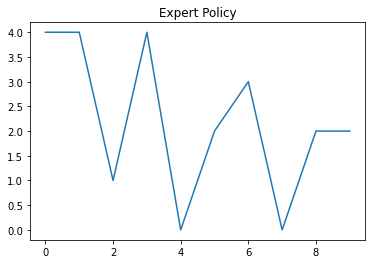

In [2]:
theta = 1e-10
expert_val_func,expert_policy,expert_deltas = policy_iter(rewards=rewards,t_matrix=t_matrix,theta=theta,gamma=gamma)
expert_q_func = get_q_func(rewards=rewards,t_matrix=t_matrix,val_func=expert_val_func,gamma=gamma)

plt.figure(0)
plt.plot(expert_deltas)
plt.title('Expert Learning Curve')
plt.figure(1)
plt.plot(expert_val_func)
plt.title('Expert Value Function')
plt.figure(2)
plt.imshow(expert_q_func)
plt.title('Expert Q Function')
plt.colorbar()
plt.figure(3)
plt.plot(expert_policy)
plt.title('Expert Policy')

In [3]:
dataset = {}
points_per_s_a = 100000
for i in range(n_state):
    dataset[str(i)] = {}
    for j in range(n_action):
        dataset[str(i)][str(j)] = np.random.choice(n_state,size=points_per_s_a,p=t_matrix[i][j])

In [7]:
theta_offline = 0.1
# working values 
#offline_val_func,offline_policy,offline_deltas= offline_policy_iter(rewards=rewards,t_matrix=t_matrix,theta=theta_offline,gamma=gamma,dataset=dataset,n_next_state=1000,n_episodes=100,T=1000,max_iter=20)
offline_val_func,offline_policy,offline_deltas= offline_policy_iter(rewards=rewards,t_matrix=t_matrix,theta=theta_offline,gamma=gamma,dataset=dataset,n_next_state=100,n_episodes=20,T=500,max_iter=20)

Iteration 0
Policy Stable: False
Delta: 4363.327513416561
Iteration 1
Policy Stable: False
Delta: 3408.5829065678818
Iteration 2
Policy Stable: False
Delta: 250.54674304831224
Iteration 3
Policy Stable: False
Delta: 57.336431537264616
Iteration 4
Policy Stable: False
Delta: 198.77584184976786
Iteration 5
Policy Stable: False
Delta: 167.61486338131
Iteration 6
Policy Stable: False
Delta: 80.75545451328071
Iteration 7
Policy Stable: False
Delta: 158.3094700071424
Iteration 8
Policy Stable: False
Delta: 166.11734446892115
Iteration 9
Policy Stable: False
Delta: 45.11634375094036
Iteration 10
Policy Stable: False
Delta: 45.25441799986311
Iteration 11
Policy Stable: False
Delta: 91.38056475399753
Iteration 12
Policy Stable: True
Delta: 63.723985593042016


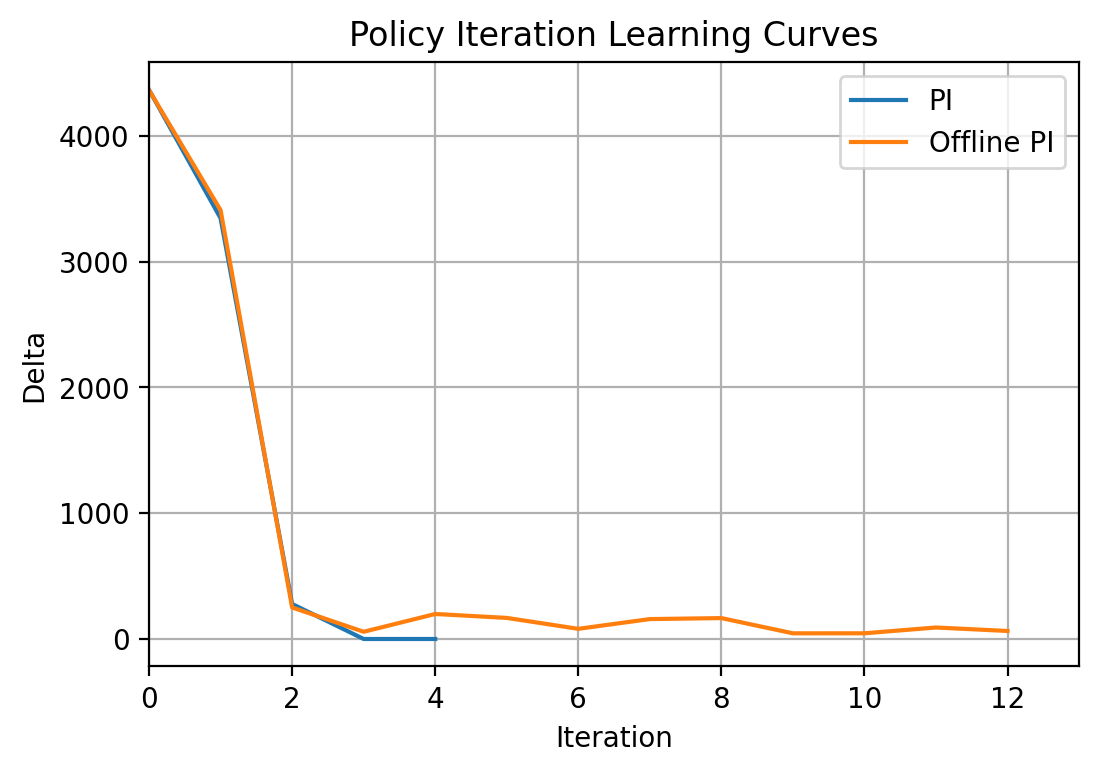

In [11]:
plt.figure(0,dpi=200)
plt.plot(expert_deltas,label='PI')
plt.plot(offline_deltas,label='Offline PI')
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('Delta')
plt.xlim((0,len(offline_deltas)))
plt.legend()
plt.title('Policy Iteration Learning Curves')
plt.savefig('Policy Iteration Learning Curves.png')

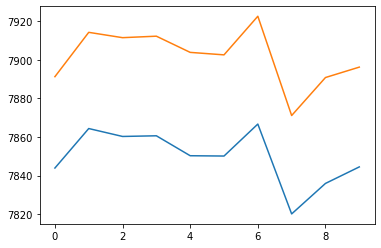

In [43]:
plt.plot(val_next)
plt.plot(val_iter_func)

In [4]:
val_next = np.zeros(n_state)
n_episodes = 1000
episode_scale = 1/n_episodes
T = 500
ep_scores = np.zeros((n_state,n_episodes))
for i in range(n_state):
    for q in range(n_episodes):
        print('State '+str(i)+' Episode '+str(q))
        #reward_steps = np.zeros(T)
        state = i
        for step in range(T):
            action = int(expert_policy[state])
            val_next[i] += episode_scale*(gamma**step)*rewards[state][action]
            ep_scores[i][q] += (gamma**step)*rewards[state][action]
            #reward_steps[step] = episode_scale*(gamma**step)*rewards[state][action]
            #print('Value: '+str(val_next[i]))
            #state = np.random.choice(dataset[str(state)][str(action)])
            state = np.random.choice(n_state,p=t_matrix[state][action])

ate 0 Episode 8
State 0 Episode 9
State 0 Episode 10
State 0 Episode 11
State 0 Episode 12
State 0 Episode 13
State 0 Episode 14
State 0 Episode 15
State 0 Episode 16
State 0 Episode 17
State 0 Episode 18
State 0 Episode 19
State 0 Episode 20
State 0 Episode 21
State 0 Episode 22
State 0 Episode 23
State 0 Episode 24
State 0 Episode 25
State 0 Episode 26
State 0 Episode 27
State 0 Episode 28
State 0 Episode 29
State 0 Episode 30
State 0 Episode 31
State 0 Episode 32
State 0 Episode 33
State 0 Episode 34
State 0 Episode 35
State 0 Episode 36
State 0 Episode 37
State 0 Episode 38
State 0 Episode 39
State 0 Episode 40
State 0 Episode 41
State 0 Episode 42
State 0 Episode 43
State 0 Episode 44
State 0 Episode 45
State 0 Episode 46
State 0 Episode 47
State 0 Episode 48
State 0 Episode 49
State 0 Episode 50
State 0 Episode 51
State 0 Episode 52
State 0 Episode 53
State 0 Episode 54
State 0 Episode 55
State 0 Episode 56
State 0 Episode 57
State 0 Episode 58
State 0 Episode 59
State 0 Episode 

KeyboardInterrupt: 

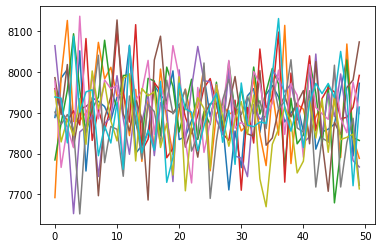

In [36]:
plt.plot(ep_scores.T)

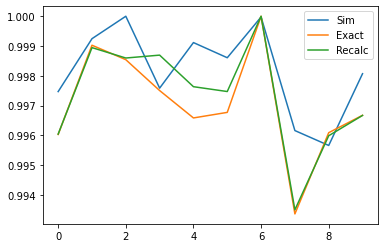

In [27]:
theta=1e-10
delta = theta*10
val_iter_func = np.zeros(n_state)
while delta>theta:
    delta = 0
    for i in range(n_state):
        v_temp = val_iter_func[i]
        max_buffer = np.zeros(n_action)
        j = int(expert_policy[i])
        val_iter_func[i] = rewards[i][j] + gamma*np.dot(val_iter_func,t_matrix[i][j])
        delta = np.max((delta,np.abs(v_temp-val_iter_func[i])))

plt.plot(val_next/np.max(val_next),label='Sim')
plt.plot(expert_val_func/np.max(expert_val_func),label='Exact')
plt.plot(val_iter_func/np.max(val_iter_func),label='Recalc')
plt.legend()

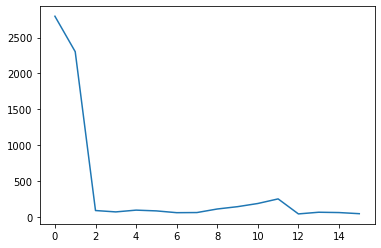

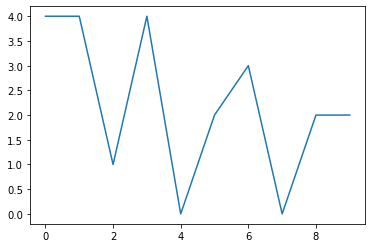

In [9]:
plt.figure(0)
plt.plot(offline_deltas)
plt.figure(1)
plt.plot(offline_policy)

In [10]:
policy1 = np.zeros(10)
policy2 = np.copy(policy1)

In [11]:
policy1[0] = 1

In [12]:
policy2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])